In [40]:
import numpy as np                    # tensorflow 는 3.9와 호환이 안되기에 3.8버전으로.

In [41]:
import tensorflow as tf               # tensorflow 는 2.3.0 버전으로.

In [42]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt

In [44]:
%matplotlib inline

In [45]:
import seaborn as sns

In [46]:
sns.set(style="darkgrid")

In [47]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']

In [48]:
cars = pd.read_csv("C:/Users/user8/learning/source/chap2/data/car_evaluation.csv", names = cols, header=None)

In [49]:
plot_size = plt.rcParams["figure.figsize"]

In [50]:
plot_size

[6.4, 4.8]

<AxesSubplot: ylabel='output'>

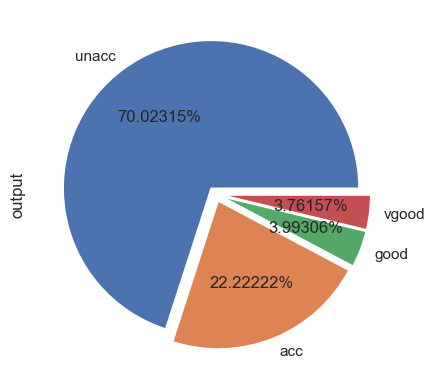

In [51]:
cars.output.value_counts().plot(kind = 'pie', autopct="%0.05f%%", explode = (0.05,0.05,0.05,0.05))

In [52]:
# 지도 학습
# 분류 - 이산형 - 훈련데이터의 레이블 중 하나로 분류
# 회귀 - 연속형 - 연속된 값을 예측

In [53]:
# K-최근접 이웃
# 새로운 입력을 받았을 때 모든 데이터와 인스턴스 기반거리를 측정하여 가장 많은 속성을 가진 클러스터에 할당하는 분류
# 새로운 데이터와 인접한 K 개의 데이터를 찾아 더 많은 속성을 가진 클러스터에 할당
# K 값의 선택에 따라 새로운 데이터에 대한 분류 결과가 달라질 수도 있다.

In [54]:
from sklearn import metrics             # 모델 성능 평가 라이브러리

In [55]:
import numpy as np                      # 벡터 및 행렬의 연산 처리를 위한 라이브러리

In [56]:
import matplotlib.pyplot as plt         # 시각화 라이브러리

In [57]:
import pandas as pd                     # 데이터 분석 및 조작을 위한 라이브러리

In [58]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [59]:
data = pd.read_csv("C:/Users/user8/learning/source/chap3/data/iris.data", names=names)

In [60]:
data                                     # 판다스 데이터 프레임

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [61]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
x = data.iloc[ : , :-1].values          # 주어진 데이터
y = data.iloc[ : , 4].values            # 예측할 데이터

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [67]:
                                        # 검정데이터를 20%로 하여 학습데이터와 검정데이터를 분리해준다.

In [72]:
from sklearn.preprocessing import StandardScaler

In [80]:
s = StandardScaler()                    # 특성 스케일링, 정규화를 시켜줌 (평균 = 0, 표준편차 = 1 )

In [82]:
x_train = s.fit_transform(x_train)      # fit() 을 수행한 후 transform 수행 해줌.
x_test = s.fit_transform(x_test)        # 해당 데이터를 정규화를 시켜준다.

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
kn = KNeighborsClassifier(n_neighbors=50)

In [85]:
                                         # K = 50 인 K-최근접 이웃 모델 생성

In [86]:
kn.fit(x_train, y_train)                 # 모델 훈련

KNeighborsClassifier(n_neighbors=50)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
y_pred = kn.predict(x_test)             # 검정데이터를 넣어 예측값 추출
print(f"정확도 : {accuracy_score(y_test, y_pred)}")
                                        # 추출된 예측값과 검정데이터를 비교하여 정확도 출력

정확도 : 0.9


In [ ]:
# 최적의 k 값 찾기

In [96]:
k = 50                                  # 최대 K
acc_array = np.zeros(k)                 # k개의 0 으로 이루어진 array 생성

for i in np.arange(1, k+1, 1):         # 1부터 k+1 까지 1씩 증가. ( range와 같은 기능을 하지만 range와 달리 실수도 지원 )
    
    cl = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
                                        # k가 i 인 모델을 생성하여 훈련데이터로 모델 훈련
    y_pred = cl.predict(x_test)         # 예측값 추출
    acc = accuracy_score(y_test, y_pred)# 예측값과 검정값을 비교하여 정확도 추출
    
    acc_array[i-1] = acc                # 생성해둔 array에 저장
    
max_arr = np.amax(acc_array)            # 최대 정확도 추출
lst = list(acc_array)                   # index를 사용 하기 위해 array를 리스트로 변환
k = lst.index(max_arr) +1               # 최대 정확도의 인덱스에 +1

print(f"정확도 {max_arr * 100}% 으로 최적의 k는 {k+1} 입니다.")

정확도 100.0% 으로 최적의 k는 3 입니다.


In [ ]:
# 서포트 벡터 머신
# 분류를 위한 기준선을 정의하는 모델
# 새로운 입력이 들어오면 기준선을 기준으로 경계의 어느쪽에 해당하는지 분류

In [ ]:
# 서포트 벡터 : 결정경계와 가장 가까지 있는 데이터들. 경계를 정의하는 결정적인 역할
# 마진 : 결정경계와 서포트벡터의 사이의 거리

In [98]:
# 하드 마진 : 이상치 허용 x
# 소프트 마진 : 이상치 허용 o

In [112]:
from sklearn import svm, metrics, datasets, model_selection

In [113]:
import tensorflow as tf

In [114]:
import os

In [115]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'    # 로깅 제어

In [116]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size = 0.6, random_state = 42)

In [117]:
svm  = svm.SVC(kernel='linear', C = 1.0, gamma = 0.5)
                                            # 선형 분류로 모델 생성
                                            # Noise가 많은 데이터라면 C를 작게, Noise가 별로 없는 데이터라면 C를 크게
                                            # C가 커지면 커질수록 하드, C가 작아질수록 소프트
                                            # gamma 가 높을 수록 훈련 데이터에 민감하게 반응 -> 높으면 결정경계가 곡선 형태를 띈다.
svm.fit(x_train, y_train)                   # 모델 훈련

SVC(gamma=0.5, kernel='linear')

In [121]:
pre = svm.predict(x_test)                  # 예측값 추출
print(accuracy_score(y_test, pre) * 100, "%")
                                           # 98.89%

98.88888888888889 %


In [122]:
# 결정트리
# 이상치가 많은 값으로 구성된 데이터셋을 다룰 때 유용

In [ ]:
# 순도 : 범주 안에서 같은 종류의 데이터만 모여있는 정도
# 불순도 : 서로 다른 데이터가 섞여있는 정도

In [123]:
# 엔트로피 : 확률변수의 불확실성을 수치로 나타낸 것
# 지니계수 : 불순도를 측정하는 지표

In [124]:
import pandas as pd

In [169]:
df = pd.read_csv("C:/Users/user8/learning/source/chap3/data/titanic/train.csv", index_col = "PassengerId")
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
                                                        # 사용할 데이터 전처리
df['Sex'] = df['Sex'].map({'male':0, 'female':1})       # 남자면 0 여자면 1
df = df.dropna()                                        # 결측치 제거

x = df.drop('Survived', axis = 1)                       
y = df['Survived']                                      

In [170]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
5,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,3,1,39.0,0,5,29.1250,0
887,2,0,27.0,0,0,13.0000,0
888,1,1,19.0,0,0,30.0000,1


In [173]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x, y)        # 학습데이터, 검정데이터 생성

In [174]:
from sklearn import tree

model = tree.DecisionTreeClassifier()              # 모델 생성
model.fit(xtr, ytr)                                # 모델 학습

DecisionTreeClassifier()

In [175]:
ypr = model.predict(xte)                           # 예측치 추출

In [176]:
from  sklearn.metrics import accuracy_score

accuracy_score(yte, ypr) * 100                     # 정확도 추출 => 76.54 %

76.53631284916202

In [177]:
from sklearn.metrics import confusion_matrix      # 혼돈 매트릭스

pd.DataFrame(confusion_matrix(yte, ypr), columns = ['PNS', 'PS'], index = ["TNS", "TS"])

,PNS,PS
TNS,79,21
TS,21,58
